In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
d0 = pd.read_csv('../data/mnist_train.csv')

In [44]:
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [45]:
l = d0['label']
#print(l)
d = d0.drop('label',axis=1)

In [46]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


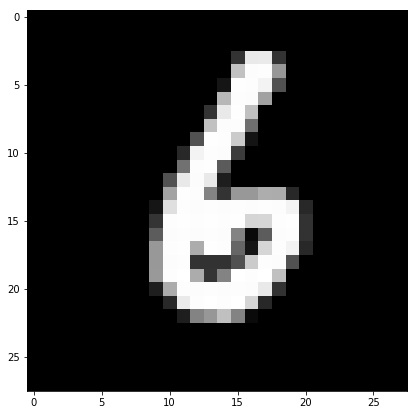

6


In [47]:
plt.figure(figsize = (7,7))
index_no = 160
grid_data = d.iloc[index_no].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation = "none", cmap = "gray")
plt.show()
print(l[index_no])

# 2D Visualization

In [48]:
labels = l
data = d

In [49]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print("Shape pf standardized matrix is: ",standardized_data.shape)

Shape pf standardized matrix is:  (42000, 784)


In [50]:
sample_data = standardized_data
covar_mat = np.matmul(sample_data.T, sample_data)
print("Shape of covariance matri is: ",covar_mat.shape)

Shape of covariance matri is:  (784, 784)


In [71]:
from scipy.linalg import eigh

#eigh function returns eigen values in asceding order, hence we specify the indices of the top two eigen values that we wish to work with
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Shape of eigen vectors: ",vectors.shape)
#Reordering to get compatible result with scikit:
tmp = vectors[:,0].copy()
vectors[:,0] = vectors[:,1]
vectors[:,1] = tmp
vectors = vectors.T
print("Updated shape of eigen vectors: ", vectors.shape)

Shape of eigen vectors:  (784, 2)
Updated shape of eigen vectors:  (2, 784)


In [72]:
import matplotlib.pyplot as plt

#Projecting data samples onto the two selected eigen vectors direction:
new_coordinates = np.matmul(vectors, sample_data.T)
print("Shape of the final projected data: ",new_coordinates.shape)

Shape of the final projected data:  (2, 42000)


In [73]:
import pandas as pd
#Now, appending the labels to the new data to plot them finally using a dataframe:
new_coordinates = np.vstack((new_coordinates, labels)).T
#Creating the dataframe:
dataframe = pd.DataFrame(data = new_coordinates, columns = ("1st principal axis","2nd principal axis","label"))
print(dataframe.head())

   1st principal axis  2nd principal axis  label
0           -5.140478           -5.226445    1.0
1           19.292332            6.032996    0.0
2           -7.644503           -1.705813    1.0
3           -0.474207            5.836139    4.0
4           26.559574            6.024818    0.0


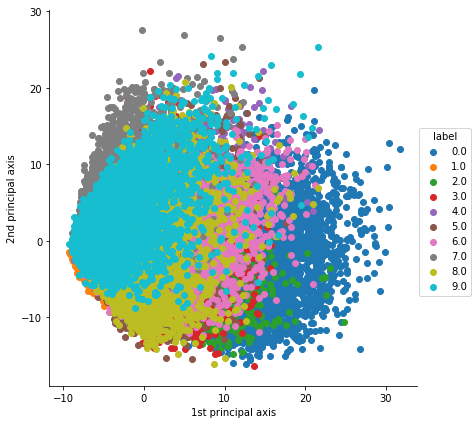

In [74]:
#Plotting the above 2d data with seaborn:
import seaborn as sn
sn.FacetGrid(dataframe,hue = 'label',size = 6).map(plt.scatter, "1st principal axis","2nd principal axis").add_legend()
plt.show()

# PCA using SciKit-Learn

In [60]:
#PCA initization
from sklearn import decomposition
pca = decomposition.PCA()

In [61]:
#Parameter configurations
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("Shape of data after pefroming PCA: ",pca_data.shape)

Shape of data after pefroming PCA:  (42000, 2)


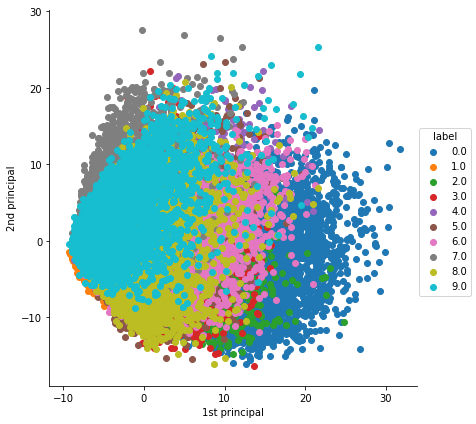

In [62]:
#For plotting, performing same operations as above:
pca_data = np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data = pca_data, columns = ("1st principal", "2nd principal","label"))
sn.FacetGrid(pca_df,hue = "label",size = 6).map(plt.scatter,"1st principal", "2nd principal").add_legend()
plt.show()

# PCA for variance intuition

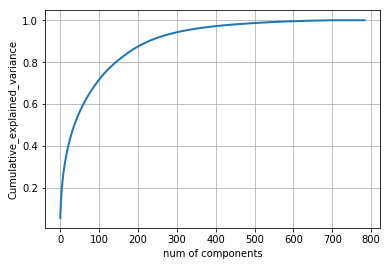

In [75]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
#finding variance ration retained with each of the individual eigen vector direction
percentage_of_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_variance_explained = np.cumsum(percentage_of_variance_explained)

#Plot showing different values of variance explained for including different number of featuers:
plt.figure(1, figsize = (6,4))
plt.clf()
plt.plot(cum_variance_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('num of components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [76]:
#here we can see that, from y axis, we can select the variance value we wish to retain, using which we will know the number of components we are required to be left with after the reduction to get such a variance.